In [15]:
# import all necessay library
%time
import numpy as np
from numpy import linalg as LA
from functions import ClusterMerits, AuxiliarFunctions
from sklearn import preprocessing
from sklearn.datasets.samples_generator import make_blobs

import matplotlib.pyplot as plt
%matplotlib inline

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 5.01 µs


In [16]:
# load the data and little data
%time
data_path = '/home/micael/MyWorkspace/DATA'
signal = np.load(data_path+'/'+'lvbb125Matrix.npy')[0:5000,:]
signal_part = np.load(data_path+'/'+'lvbb125Matrix.npy')[0:250,:]
signal_trgt = np.ones(signal.shape[0])

ttbar = np.load(data_path+'/'+'TTbarMatrix.npy')
ttbar_part = np.load(data_path+'/'+'TTbarMatrix.npy')[0:250,:]
bkg = ttbar
bkg_trgt = np.zeros(bkg.shape[0])

data = np.append(signal,bkg,axis=0)
little_data = np.append(signal_part,ttbar_part,axis=0)
trgt = np.append(signal_trgt,bkg_trgt,axis=0)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 9.06 µs


(500, 24)

In [17]:
# shuffle the little data
np.random.shuffle(little_data)

desvio padrao  0.0414359488125


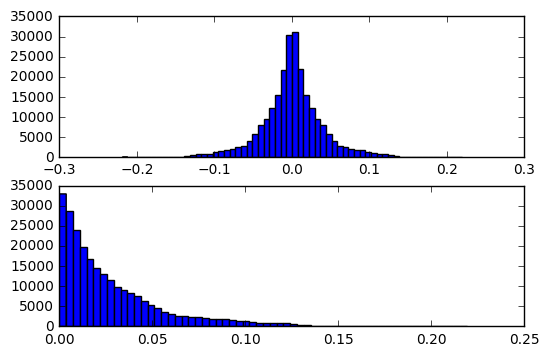

desvio padrao  0.131918432404


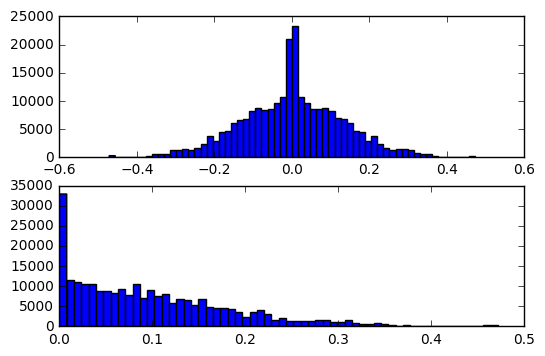

desvio padrao  0.0702123024602


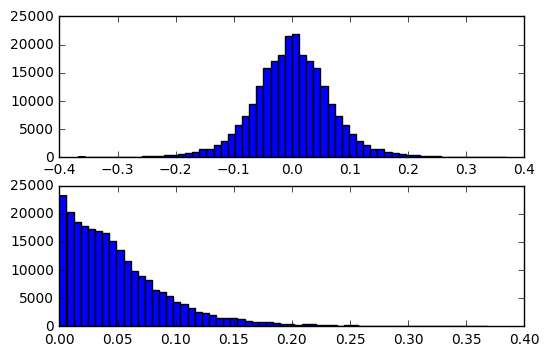

desvio padrao  0.227705352136


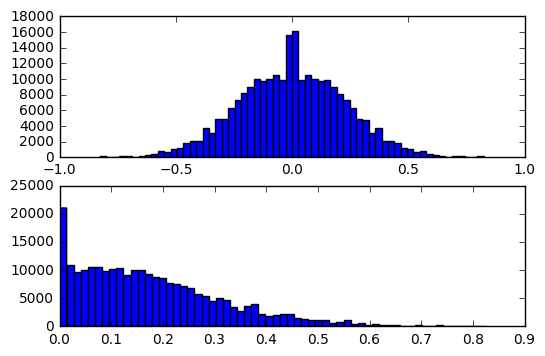

desvio padrao  0.118053810236


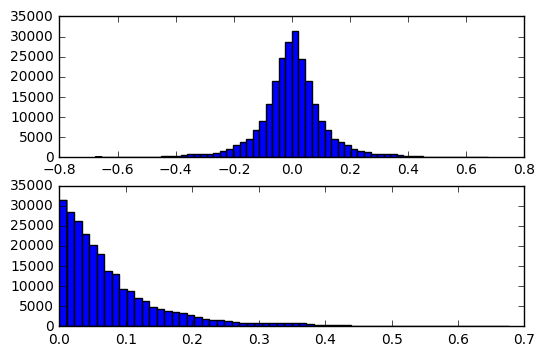

desvio padrao  5.53061144364


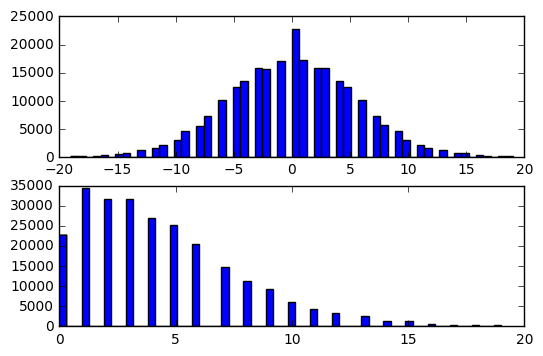

desvio padrao  37.6225143419


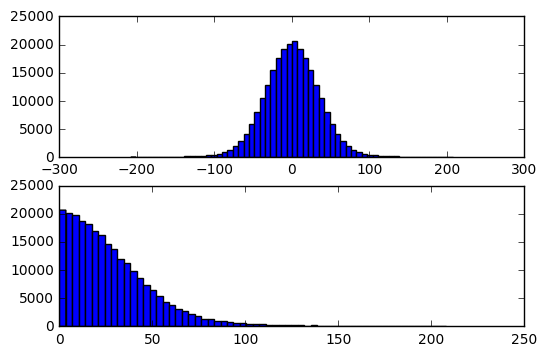

desvio padrao  47.2444222797


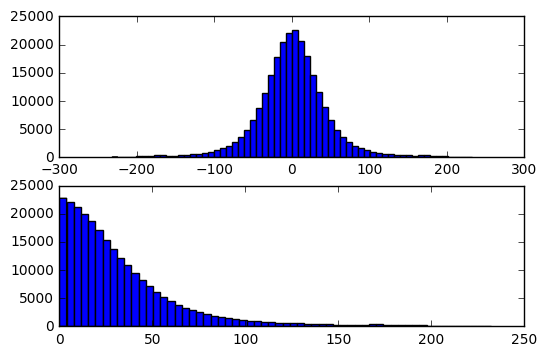

desvio padrao  1.51703944854


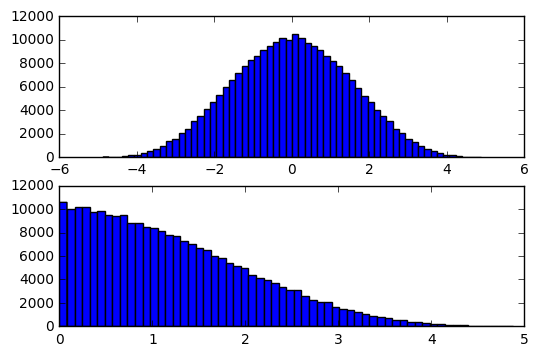

desvio padrao  2.56891789703


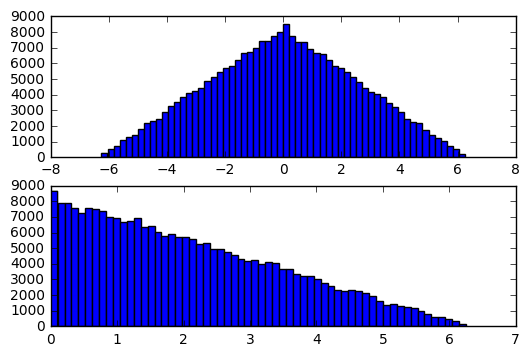

desvio padrao  136.140742011


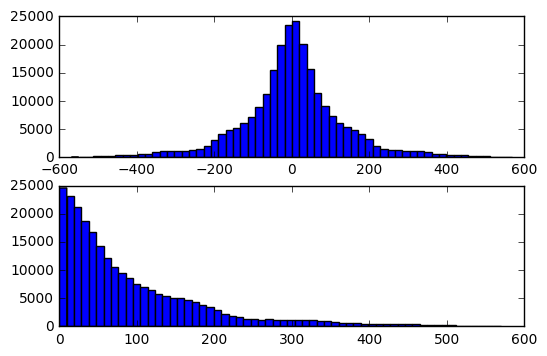

desvio padrao  25.7913659807


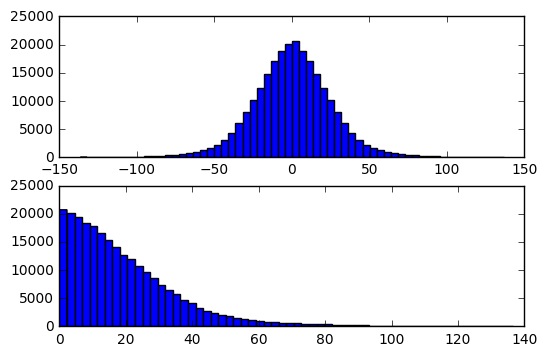

desvio padrao  0.0401150684553


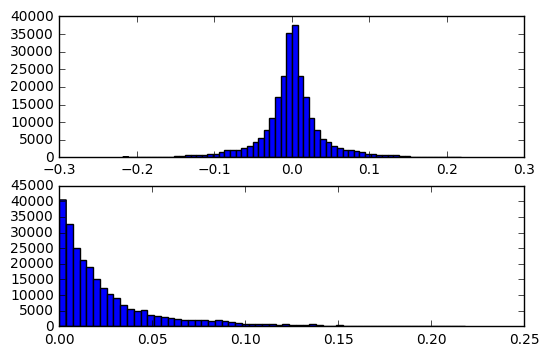

desvio padrao  0.101030800235


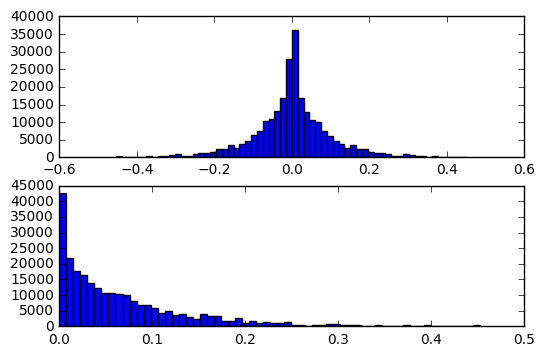

desvio padrao  0.0792473280502


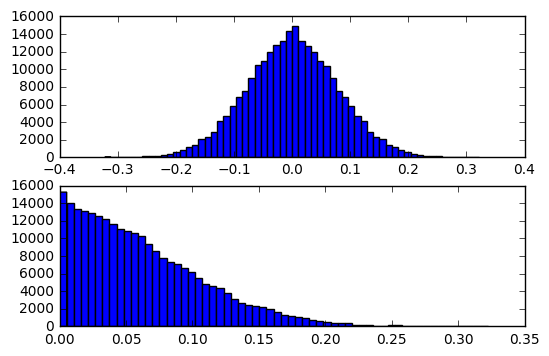

desvio padrao  0.21943489548


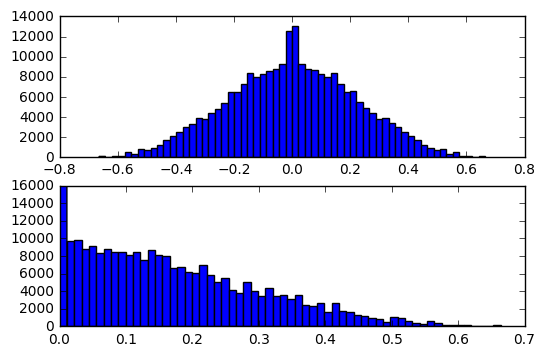

desvio padrao  0.153873709221


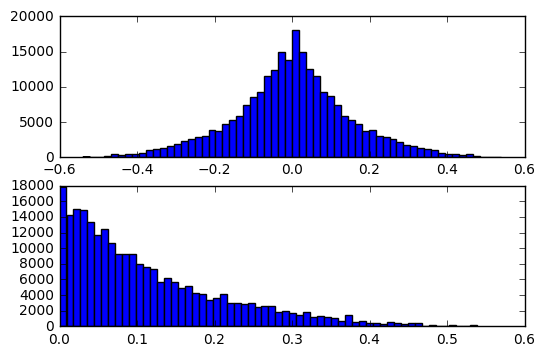

desvio padrao  4.45919664933


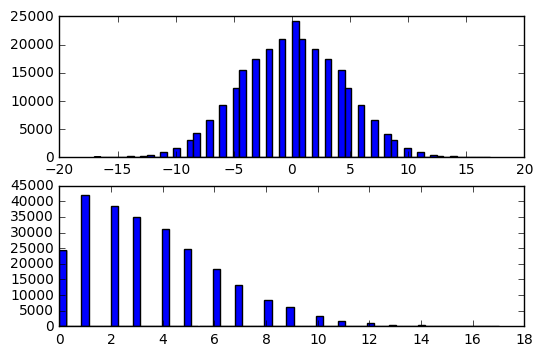

desvio padrao  28.6967509765


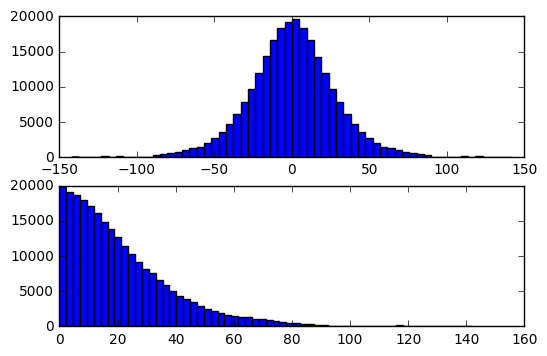

desvio padrao  27.4679170358


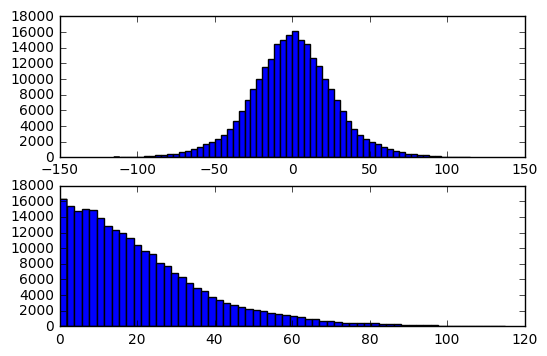

desvio padrao  1.63628498227


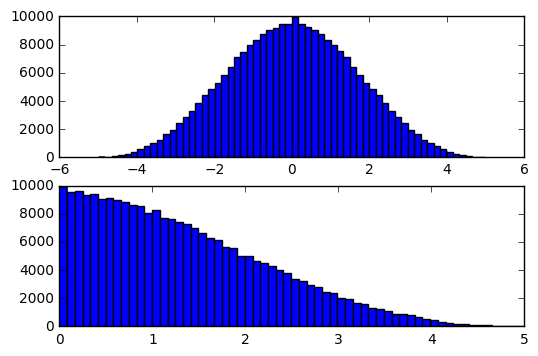

desvio padrao  2.53526560266


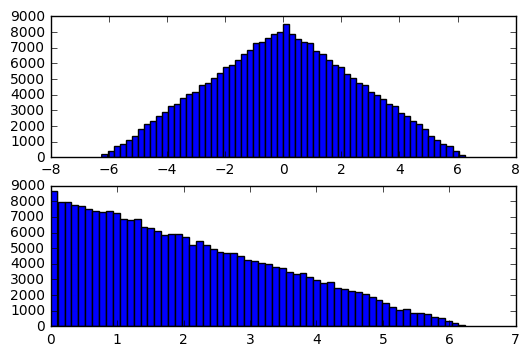

desvio padrao  78.9871668079


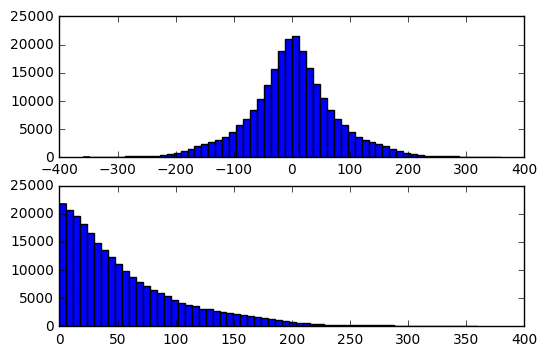

desvio padrao  25.7913659807


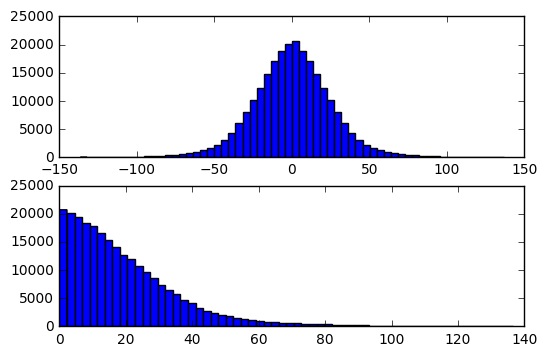

In [19]:
# distance histograms - use to estimate the sigma | better way?

for k in range(little_data.shape[1]):
    
    for i in range(little_data.shape[0]-1):
        for j in range(little_data.shape[0]):
            dist0 = little_data[i,k]-little_data[j,k]
            dist1 = abs(little_data[i,k]-little_data[j,k])
            dataBuffer0 = np.array([dist0])
            dataBuffer1 = np.array([dist1])
            if i==0:
                data0 = dataBuffer0
                data1 = dataBuffer1
            else:
                data0 = np.append(data0,dataBuffer0, axis=0)
                data1 = np.append(data1,dataBuffer1, axis=0)
            
    plt.subplot(211)
    print 'desvio padrao ', np.std(data0)
    plt.hist(data0,bins=60)
    plt.subplot(212)
    plt.hist(data1,bins=60)
    plt.show()

In [26]:
# random data set for testing 

n_samples=200
n_features=2
centers=[[-2,-2],[2,2]] 
cluster_std=1.0

X, y = make_blobs(n_samples, n_features, centers, cluster_std,
                  random_state=None)
#X,y

desvio padrao  3.1789764016


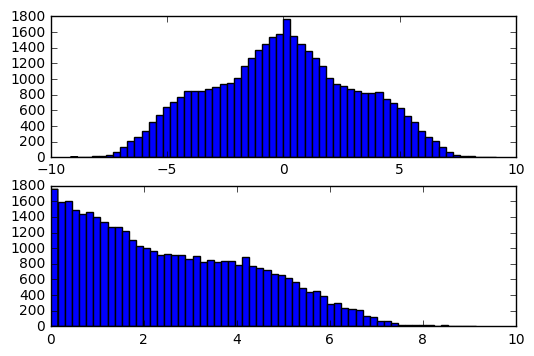

desvio padrao  3.10855142689


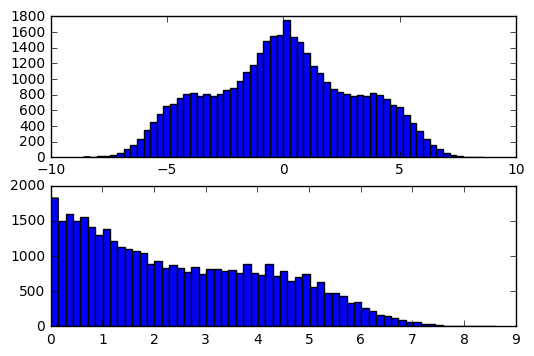

In [27]:
for k in range(X.shape[1]):
    
    for i in range(X.shape[0]-1):
        for j in range(X.shape[0]):
            dist0 = X[i,k]-X[j,k]
            dist1 = abs(X[i,k]-X[j,k])
            dataBuffer0 = np.array([dist0])
            dataBuffer1 = np.array([dist1])
            if i==0:
                data0 = dataBuffer0
                data1 = dataBuffer1
            else:
                data0 = np.append(data0,dataBuffer0, axis=0)
                data1 = np.append(data1,dataBuffer1, axis=0)
            
    plt.subplot(211)
    print 'desvio padrao ', np.std(data0)
    plt.hist(data0,bins=60)
    plt.subplot(212)
    plt.hist(data1,bins=60)
    plt.show()

In [28]:
# calculate the centers using ClusterMerits

C_1 = ClusterMerits.Baricenter(X[y==0,:])
C_2 = ClusterMerits.Baricenter(X[y==1,:])

print C_1,C_2
dataSetCenters = np.zeros([len(centers),2])

for i in range(2):
    dataSetCenters[i,:] = ClusterMerits.Baricenter(X[y==i,:])
dataSetCenters

[-2.07019482 -1.84555742] [ 1.93577359  2.08727415]


array([[-2.07019482, -1.84555742],
       [ 1.93577359,  2.08727415]])

In [31]:
# create a sinapses array 

sinapses = np.array([[-4.342,  -3.433 ],[4.465,  3.456]])

sinapses

array([[-4.342, -3.433],
       [ 4.465,  3.456]])

In [30]:
# this training works

for ievent in range(X.shape[0]):
    #print '----------------------------------------'
    #print sinapses[y[ievent],:]
    sinapses[y[ievent],:] = sinapses[y[ievent],:] + 0.1*(X[ievent,:]-sinapses[y[ievent],:])
    #print sinapses[y[ievent],:]
    #print '----------------------------------------'
sinapses

array([[-2.49927781, -2.18144969],
       [ 1.92731797,  2.1639568 ]])

In [32]:
# this functions works too

def update_sinapses(sinapse_id,event,train_parameter):
    sinapses[sinapse_id,:] = (sinapses[sinapse_id,:]+train_parameter*(event-sinapses[sinapse_id,:]))
    

for ievent in range(X.shape[0]):
    update_sinapses(y[ievent],X[ievent,:],0.1)


sinapses

array([[-2.49927781, -2.18144969],
       [ 1.92731797,  2.1639568 ]])

In [33]:
# try to use the SupervisedKohonen 

from functions import SupervisedKohonen

train_params = SupervisedKohonen.TrainParameters()

train_params.learning_rate = 0.1

knn = SupervisedKohonen.KohonenNN()



In [34]:
knn.fit(X,y,trn_params=train_params)

Supervised Kohonen NN TrainParameters
Learning Rate: 0.10000
Verbose: False
Number of events: 200


array([[ 0.15254577,  0.36291566],
       [ 0.2470678 ,  0.40282165]])

In [6]:
knn.sinapses

array([[ 0.28801739, -0.32517563],
       [ 0.22837823, -0.93149811]])

In [9]:
train_params.learning_rate

0.1